## Exercise: Use Digit Dataset and find the optimal model and hyperparameter

In [12]:
from sklearn.datasets import load_digits
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np

In [13]:
datasets = load_digits()

In [14]:
dir(datasets)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [15]:
datasets.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

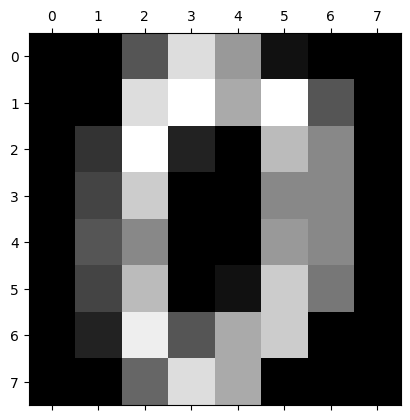

In [17]:
plt.gray()
plt.matshow(datasets.images[0])

In [18]:
datasets.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [19]:
digits_df = pd.DataFrame(np.array(datasets.data), columns=datasets.feature_names)

In [20]:
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [32]:
model_params = {
    'svm':{
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel':['rbf', 'linear']
        }
    },
    'random_forest_classifier':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 50, 20]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(),
        'params': {
        }
    },
    'gaussian_nb':{
        'model': GaussianNB(),
        'params': {
            
        }
    },
    'multinomial_nb':{
        'model': MultinomialNB(),
        'params': {
        }
    },
    'decision_tree_classifier':{
        'model': DecisionTreeClassifier(),
        'params': {
        }
    },   
}

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(datasets.data, datasets.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\siddharth.sp\Desktop\Learn2Live\data science\data analytics\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\siddharth.sp\Desktop\Learn2Live\data science\data analytics\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver 

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest_classifier,0.937693,{'n_estimators': 100}
2,logistic_regression,0.913765,{}
3,gaussian_nb,0.806928,{}
4,multinomial_nb,0.870350,{}
5,decision_tree_classifier,0.775786,{}
